<a href="https://colab.research.google.com/github/tayfunai/PytorchPractise/blob/main/pytorch_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Custom Dataset

### Importing a PyTorch and setting up device-agnostic code

In [141]:
import torch
from torch import nn

In [142]:
torch.__version__

'2.6.0+cu124'

In [143]:
# Set up device-agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [144]:
device

'cpu'

In [145]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [146]:
# Pushing and pulling project into and from github
!git config --global user.name "Asliddin"
!git config --global user.email "asliddinmalikov999@gmail.com"


In [147]:
!git clone https://github.com/tayfunai/PytorchPractise.git

fatal: destination path 'PytorchPractise' already exists and is not an empty directory.


### 1. Get data
* Dataset I am going to work on is subset of Food101 dataset
* I am using just 3 classes of food out of 101 different categories in actual dataset
* My dataset is 10 percent of Food101 dataset images.

In [148]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

# This piece of code is to prevent redownloading dataset if it's already exist
if image_path.is_dir():
  print(f" {image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, so creating a new one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path/"pizza_steak_sushi.zip", "wb") as f:
  print(f"Downloading dataset from github...")
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

# Unzip dataset
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_file:
  print(f"Unzipping dataset...")
  zip_file.extractall(image_path)

 data/pizza_steak_sushi directory already exists... skipping download
Unzipping dataset...


In [149]:
image_path

PosixPath('data/pizza_steak_sushi')

In [150]:
!cp -r /content/data /content/PytorchPractise

In [151]:
!cp -r /content/data /content/PytorchPractise

In [152]:
!git clone https://github.com/tayfunai/PytorchPractise.git

fatal: destination path 'PytorchPractise' already exists and is not an empty directory.


### 2. Becoming one with the data (data preparation and data exploration)

#### Following folder structure is standard dataset format for computer vision projects
```
pizza_steak_sushi/ <- overall dataset folder
    train/ <- training images
        pizza/ <- class name as folder name
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- testing images
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...
```





In [153]:
# Once downloading dataset we will explore it by walking through each subfolders using os.walk()
import os
def walk_through_dir(dir_path):
  """
    Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  print(dir_path)
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(dir_path)
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [154]:
walk_through_dir(image_path)

data/pizza_steak_sushi
data/pizza_steak_sushi
There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
data/pizza_steak_sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
data/pizza_steak_sushi
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
data/pizza_steak_sushi
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
data/pizza_steak_sushi
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
data/pizza_steak_sushi
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
data/pizza_steak_sushi
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
data/pizza_steak_sushi
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
data/pizza_steak_sushi
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [155]:
image_path

PosixPath('data/pizza_steak_sushi')

In [156]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [157]:
walk_through_dir(image_path)
img_path = image_path

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [158]:
# Setup training and test paths
train_dir = img_path/"train"
test_dir = img_path/"test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Image Visualization

In [159]:
import random
from PIL import Image

# set seed
random.seed(42)

# 1. Getting all image paths
img_path_list = list(img_path.glob("*/*/*.jpg"))

In [160]:
random_image_path = random.choice(img_path_list)

In [161]:
random_image_path

PosixPath('data/pizza_steak_sushi/train/pizza/3281494.jpg')

In [162]:
# 3. Get image class from image path name
image_class = random_image_path.parent.stem
image_class

'pizza'

In [163]:
import torchvision
torch_img = torchvision.io.read_image(str(random_image_path))

Random image path: data/pizza_steak_sushi/train/pizza/3281494.jpg
Image class: pizza
Image height: 288
Image width: 512


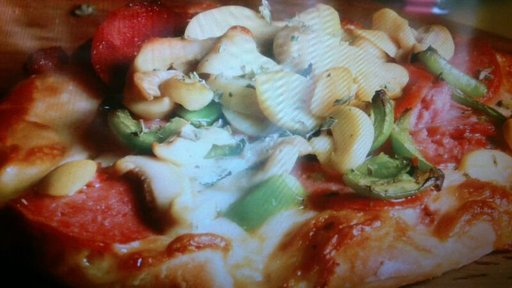

In [164]:
# Open image
PILImg = Image.open(random_image_path)

# Print image metadeta
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {PILImg.height}")
print(f"Image width: {PILImg.width}")
PILImg

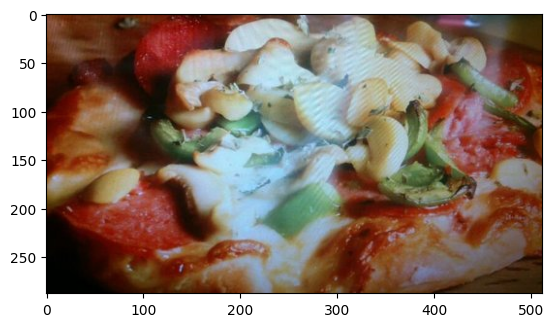

In [165]:
# Visualiza an image with matplotlib
import matplotlib.pyplot as plt
img = plt.imread(random_image_path)
plt.imshow(img)

### 3. Transofrming data into pytorch tensors


In [166]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [167]:
### 1. Transofrming data with torchvision.transforms
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our image to 64x64
    transforms.Resize(size=(64,64)),
    # Flipping the images horizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Trun the image into a tensor
    transforms.ToTensor()
])

In [168]:
data_transform(PILImg).shape

torch.Size([3, 64, 64])

### 4. Visualizing transformed images

In [169]:
def plot_transformed_images(img_path_list, transform, n=3, seed=42):
  """ Selects n number of random images from images
      loads and transfforms them and then plot original
      and transformed images
  """
  random_img_paths = random.sample(img_path_list, k=n)
  for img_path in random_img_paths:
    with Image.open(img_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis("off")

      # Transform the image
      transformed_img = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f"Transformed\nSize: {transformed_img.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {img_path.parent.stem}")

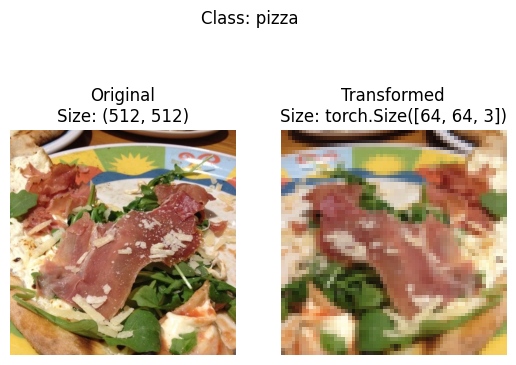

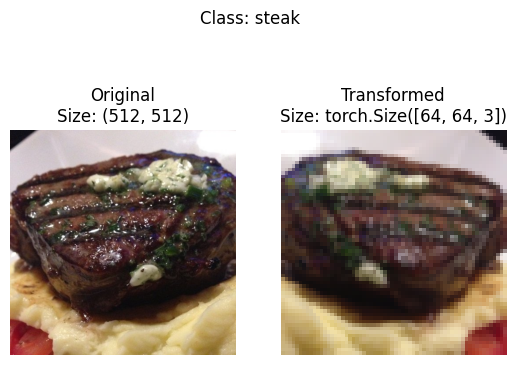

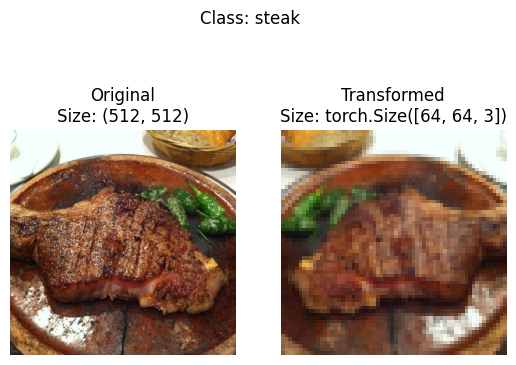

In [170]:
plot_transformed_images(
    img_path_list=img_path_list,
    transform=data_transform,
    n=3,
    seed=43
)

### 4. Option 1: Loading image data using `ImageFolder`
I can load image classification data using `torchvision.datasets.ImageFolder`**bold text**

In [171]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

In [172]:
test_data, train_data

(Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [173]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [174]:
# get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [175]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [176]:
# check the lenght of dataset
len(train_data), len(test_data)

(225, 75)

In [177]:
test_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

#### 4.1 Visualizing loaded image data from a train_data

In [178]:
img, label = train_data[0][0], train_data[0][1]

In [179]:
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [180]:
class_names[label]

'pizza'

In [181]:
print(f"Image tensors:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Label datatype: {type(label)}")
print(f"Class: {class_names[label]}")

Image tensors:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, weight]
Image permute: torch.Size([64, 64, 3]) -> [height, weight, color_channels]


Text(0.5, 1.0, 'pizza')

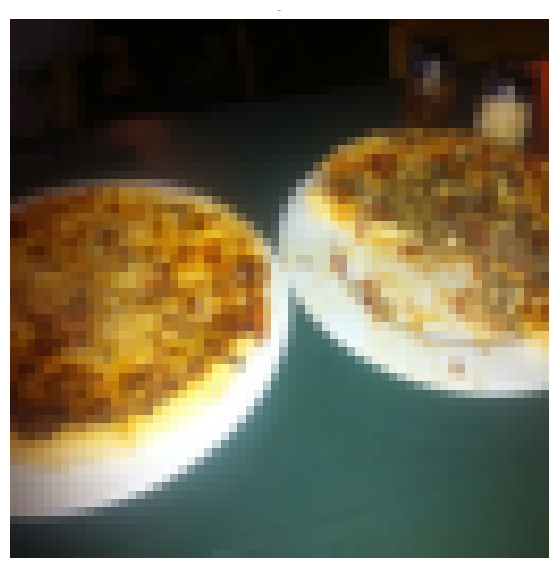

In [182]:
# rearrange the order demensions
img_permute = img.permute(1, 2, 0)

#Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, weight]")
print(f"Image permute: {img_permute.shape} -> [height, weight, color_channels]")


# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=1)

#### 4.2 Trun loaded images into `DataLoader`

In [183]:
import os
os.cpu_count()

2

In [184]:
#Turn train and test datasets into Dataloaders
BATCH_SIZE = 32
trainDataLoader = DataLoader(dataset=train_data,
        batch_size=BATCH_SIZE, shuffle=True,
                             num_workers=os.cpu_count())
testDataLoader = DataLoader(dataset=test_data,
        batch_size=BATCH_SIZE, shuffle=False,
                             num_workers=os.cpu_count())

In [185]:
trainDataLoader, testDataLoader

(<torch.utils.data.dataloader.DataLoader at 0x7910acb58950>,
 <torch.utils.data.dataloader.DataLoader at 0x7910acf00dd0>)

In [186]:
image, label = next(iter(trainDataLoader))

In [187]:
print(f"Image shape: {image.shape} -> [batch_size, color_channels, height, weight]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, weight]
Label shape: torch.Size([32])


### 5 Custom ImageFolder function
Loading image data with custom dataset


In [188]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [189]:
# Set up a pth for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])

Target dir: data/pizza_steak_sushi/train


In [190]:
class_names_found

['pizza', 'steak', 'sushi']

In [191]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [192]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """ finds the class folder names in a target directory
      by scanning target directory
  """
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [193]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### 5.1 Create a custom Dataset to replicate `ImageFolder`

In [194]:
# Write a custom dataset
from torch.utils.data import Dataset

 # 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
                targ_dir: str,
                transform=None):
    # 3. Create class attributes
    # Get all of the image path
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_index attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    return len(self.paths)

  # 6. Overwrite __getitem_() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [195]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [196]:
# Test out ImgaeFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms
                                      )

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                      transform=test_transforms
                                      )

In [197]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7910aca64090>,
 <__main__.ImageFolderCustom at 0x7910aca65110>)

In [198]:
len(test_data)

75

In [199]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [200]:
# Compare original ImageFolder and ImageFolderCustom
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


#### 5.2 Create a function to display random images

In [201]:
# 1. Take in adataset and a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool =True,
                          seed: int = None):
  # 2. Adjust display if n too high
  if n> 10:
    n=10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 adn removing shape display.")

  # 3. Set random seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through samples and display random samples
  for i, target_sample in enumerate(random_samples_idx):
    target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]

    # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
    target_image_adjust = target_image.permute(1, 2, 0)

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(target_image_adjust)
    plt.axis("off")

    if classes:
      title = f"class: {classes[target_label]}"
      if display_shape:
        title = title + f"\nshape: {target_image_adjust.shape}"
      plt.title(title)

For display purposes, n shouldn't be larger than 10, setting to 10 adn removing shape display.


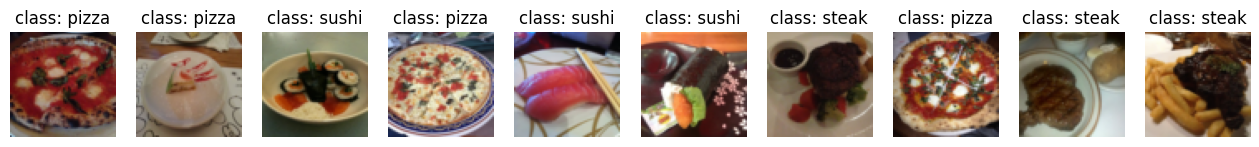

In [202]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=25,
                      classes=class_names,
                      seed=None)

#### 5.4 Turn custom loaded images into `Dataloader's`

In [203]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader

BATCH_SIZE=1
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=1,
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=1,
                                     shuffle=False)
train_dataloader_custom, test_dataloader_custom


(<torch.utils.data.dataloader.DataLoader at 0x7910ac9f2750>,
 <torch.utils.data.dataloader.DataLoader at 0x7910ac69d950>)

In [204]:
# Get image and label from custom DataLoader
image_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1 we can adjust it according to our machine
print(f"Image Shape: {image_custom.shape} -> [batch_size, color_channels, height, shape]")
print(f"Label shape: {label_custom.shape}")

Image Shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, shape]
Label shape: torch.Size([1])


### 6. Other forms of transforms (data agumentation)

In [205]:
# Let's look at trivial augment
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# We dont need to perfrom augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

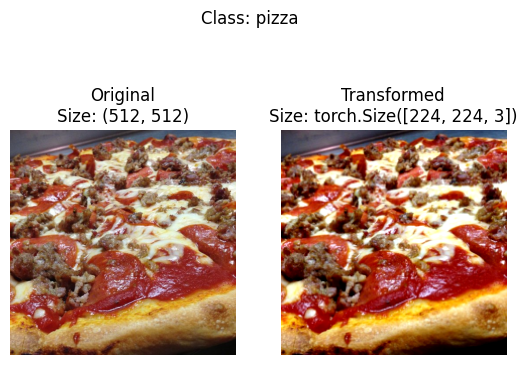

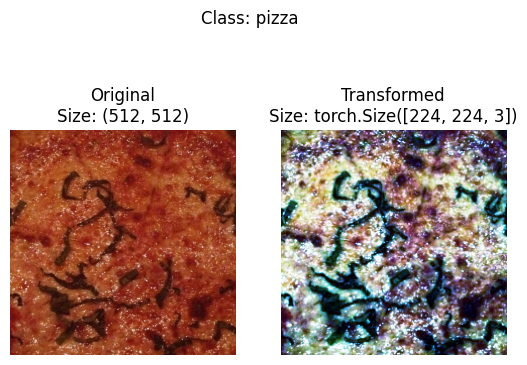

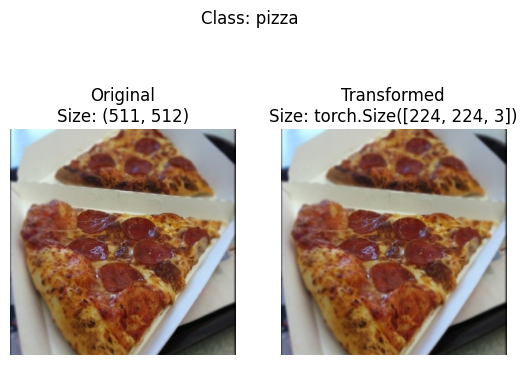

In [206]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    img_path_list=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

### 7 Model 0: TinyVGG without data agumentation

#### 7.1 Creating transforms and loading for Model 0

In [207]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [208]:
# 1. Load and transform data
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating Dataloader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

train_dataloader, test_dataloader

Creating Dataloader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7910ac52b6d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7910ac532750>)

#### 7.2 Create TinyVGG model class


In [209]:
class TinyVGG(nn.Module):
  """ Model architecture copying TinyVGG from:
      https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=0),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            hidden_units,
            hidden_units,
            kernel_size=3,
            padding=0
        ),
        nn.ReLU(),
        nn.Conv2d(
            hidden_units,
            hidden_units,
            kernel_size=3,
            padding=0
        ),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

#### 7.3 Try a forward pass on a single image (to test the model)

In [210]:
!pip install torchinfo

In [211]:
from torchinfo import summary

summary(model_0)

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      5,073
Total params: 8,083
Trainable params: 8,083
Non-trainable params: 0

In [212]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
image_single, label_single = img_batch[0].unsqueeze(0), label_batch[0]
print(f"Single image shape: {image_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
  pred = model_0(image_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n {pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n {label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
 tensor([[ 0.0208, -0.0020,  0.0095]])

Output prediction probabilities:
tensor([[0.3371, 0.3295, 0.3333]])

Output prediction label:
tensor([0])

Actual label:
 0


In [213]:
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [214]:
model_0(img_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### 7.4 Use `torchinfo` to get the idea of shapes going through my model

In [215]:
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

#### 7.5 Create train & test loop functions

In [216]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumulate accuracy metrics accross all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get avarage loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc

In [217]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels == y).sum().item()/len(test_pred_labels)

  # Adjust metrics to get avarage loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

### 7.6 Creating `train()` function to combine `train_step()` and `test_step()`

In [218]:
from tqdm.auto import tqdm

In [219]:
# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int=5
          ):
  # 2. Create empty results dictionary
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    # Print out what's happening
    print(
        f"Epoch: {epoch+1} | "
        f"train_loss: {train_loss:.4f} | "
        f"train_acc: {train_acc:.4f} | "
        f"test_loss: {test_loss:.4f} | "
        f"test_acc: {test_acc:.4f}"
    )

    # 5. Update results dictionary
    # Ensure all data is moved to CPU and converted to float for storage
    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

  # 6. Return the filled results at the end of epochs
  return results

#### 7.7 Train and Evaluate Model 0

In [220]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS
                        )

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1063 | train_acc: 0.3047 | test_loss: 1.0983 | test_acc: 0.3011
Epoch: 2 | train_loss: 1.0998 | train_acc: 0.3281 | test_loss: 1.0697 | test_acc: 0.5417
Epoch: 3 | train_loss: 1.0869 | train_acc: 0.4883 | test_loss: 1.0808 | test_acc: 0.4924
Epoch: 4 | train_loss: 1.0842 | train_acc: 0.3984 | test_loss: 1.0608 | test_acc: 0.5833
Epoch: 5 | train_loss: 1.0662 | train_acc: 0.4141 | test_loss: 1.0654 | test_acc: 0.5644
Epoch: 6 | train_loss: 1.0305 | train_acc: 0.4336 | test_loss: 1.0139 | test_acc: 0.5426
Epoch: 7 | train_loss: 0.9854 | train_acc: 0.4219 | test_loss: 0.9323 | test_acc: 0.5938
Epoch: 8 | train_loss: 0.9663 | train_acc: 0.5781 | test_loss: 0.9986 | test_acc: 0.4432
Epoch: 9 | train_loss: 0.9238 | train_acc: 0.5977 | test_loss: 1.0669 | test_acc: 0.3324
Epoch: 10 | train_loss: 0.9969 | train_acc: 0.4648 | test_loss: 1.0632 | test_acc: 0.4044
Epoch: 11 | train_loss: 0.8697 | train_acc: 0.5195 | test_loss: 0.9761 | test_acc: 0.4830
Epoch: 12 | train_l

#### 7.8 Plot the loss curves of Model 0

In [221]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [222]:
def plot_loss_curves(results: Dict[str, List[float]]):
  # Plots training curves of a results dictionary.

  # Get the loss values of reults dictionary (training and test)
  loss = results['train_loss']
  test_loss = results['test_loss']

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  # Figure out how many epochs there were
  epochs = range(len(results['train_loss']))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


<Figure size 1500x700 with 0 Axes>

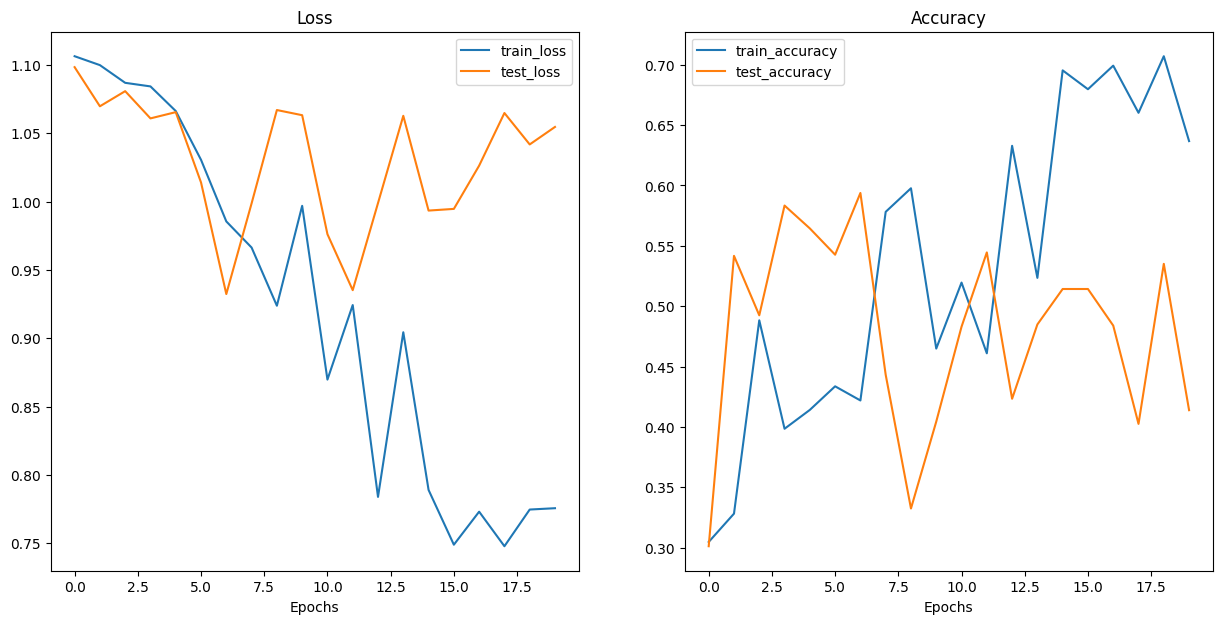

In [223]:
plot_loss_curves(model_0_results)

### 9 Model 1: TinyVGG with Data Augmentation

#### 9.1 Create transform with data augmentation


In [224]:
# Create training transform with TrivialAugment
training_transform_trivial_augment = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

#### 9.2 Create train and test `Dataset's` and `DataLoader's`

In [225]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=training_transform_trivial_augment)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [226]:
# Turn datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKS)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7910ac3766d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7910ac1184d0>)

#### 9.3 Construct and train Model 1

In [227]:
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)
).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [228]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1049 | train_acc: 0.2500 | test_loss: 1.1019 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0807 | train_acc: 0.4258 | test_loss: 1.1261 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0712 | train_acc: 0.4258 | test_loss: 1.1593 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1253 | train_acc: 0.3047 | test_loss: 1.1581 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0865 | train_acc: 0.4258 | test_loss: 1.1554 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0858 | train_acc: 0.3828 | test_loss: 1.1434 | test_acc: 0.2708
Epoch: 7 | train_loss: 1.0669 | train_acc: 0.4961 | test_loss: 1.1279 | test_acc: 0.3021
Epoch: 8 | train_loss: 1.0813 | train_acc: 0.3438 | test_loss: 1.1107 | test_acc: 0.2812
Epoch: 9 | train_loss: 1.0833 | train_acc: 0.4258 | test_loss: 1.1015 | test_acc: 0.3229
Epoch: 10 | train_loss: 1.0079 | train_acc: 0.5469 | test_loss: 0.9900 | test_acc: 0.4839
Epoch: 11 | train_loss: 0.9818 | train_acc: 0.4414 | test_loss: 0.9790 | test_acc: 0.3920
Epoch: 12 | train_l

#### 9.4 Plot the loss curves of Model 1

<Figure size 1500x700 with 0 Axes>

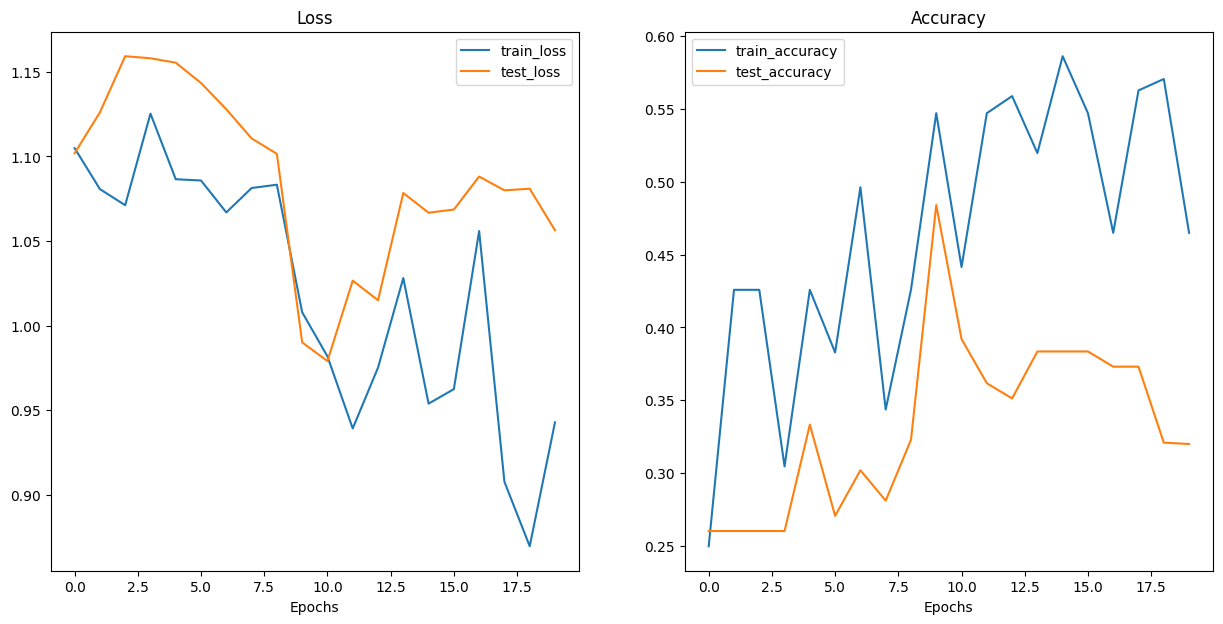

In [229]:
plot_loss_curves(model_1_results)

### 10. Compare model results

In [230]:
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.104914,0.250000,1.101928,0.260417
1,1.080687,0.425781,1.126056,0.260417
2,1.071172,0.425781,1.159275,0.260417
3,1.125308,0.304688,1.158067,0.260417
4,1.086534,0.425781,1.155441,0.333333
5,1.085762,0.382812,1.143432,0.270833
6,1.066886,0.496094,1.127891,0.302083
7,1.081325,0.343750,1.110675,0.281250
8,1.083288,0.425781,1.101544,0.322917
9,1.007887,0.546875,0.990020,0.483902


In [231]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099806,0.328125,1.069690,0.541667
2,1.086854,0.488281,1.080757,0.492424
3,1.084233,0.398438,1.060832,0.583333
4,1.066216,0.414062,1.065396,0.564394
5,1.030505,0.433594,1.013929,0.542614
6,0.985439,0.421875,0.932304,0.593750
7,0.966324,0.578125,0.998642,0.443182
8,0.923759,0.597656,1.066946,0.332386
9,0.996855,0.464844,1.063165,0.404356


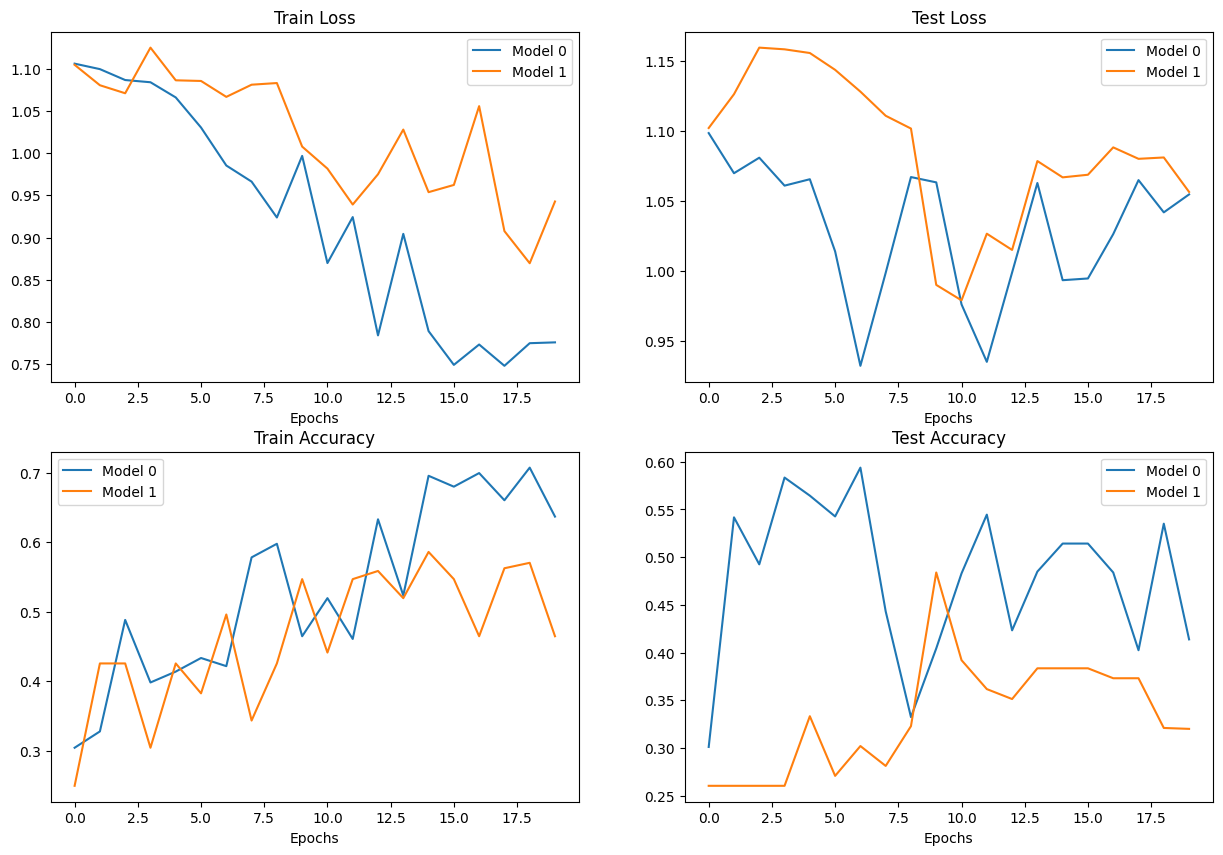

In [232]:
# Visualizing results of model_0 and model_1 using matplotlib
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()


# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

### 11. Make prediction on a custom image

In [233]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    # When downloading from Github, need to use the "row" file link
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists, skipping download.")


data/04-pizza-dad.jpeg already exists, skipping download.


#### 11.1 Loading in a custom image with PyTorch

In [234]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape :{custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")


Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape :torch.Size([3, 4032, 3024])

Custom image dty

If we try to make a prediction on an image in a different datatype to what our model was trained on, we get an error like the following:

`RuntimeError: Input type (unsigned char) and bias type (float) should be the same`


In [235]:
# Load in custom image and convert the tensor values to float32

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")


Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

#### 11.2 Predicting on custom images with a trained PyTorch model

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

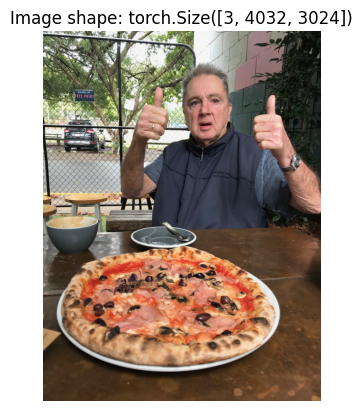

In [236]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)

In [237]:
# Create transform pipeline to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
])


# Transform target image
custom_image_transformed = custom_image_transform(custom_image).unsqueeze(dim=0)

#Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([1, 3, 64, 64])


In [238]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed)

In [239]:
custom_image_pred

tensor([[ 0.2331, -0.2865, -0.6213]])

In [240]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.2331, -0.2865, -0.6213]])
Prediction probabilities: tensor([[0.4950, 0.2944, 0.2106]])
prediction label: tensor([0])


In [241]:
# Find the prediction llabel
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class


'pizza'

In [242]:
# The values of the prediction probabilities are quite similar
custom_image_pred_probs

tensor([[0.4950, 0.2944, 0.2106]])